# **<p style="font-family:newtimeroman;font-size:200%;text-align:center;color:#690e11;">Fruit Classification Multiclass Problem | MobileNetV2 | Accuracy 98%</p>**

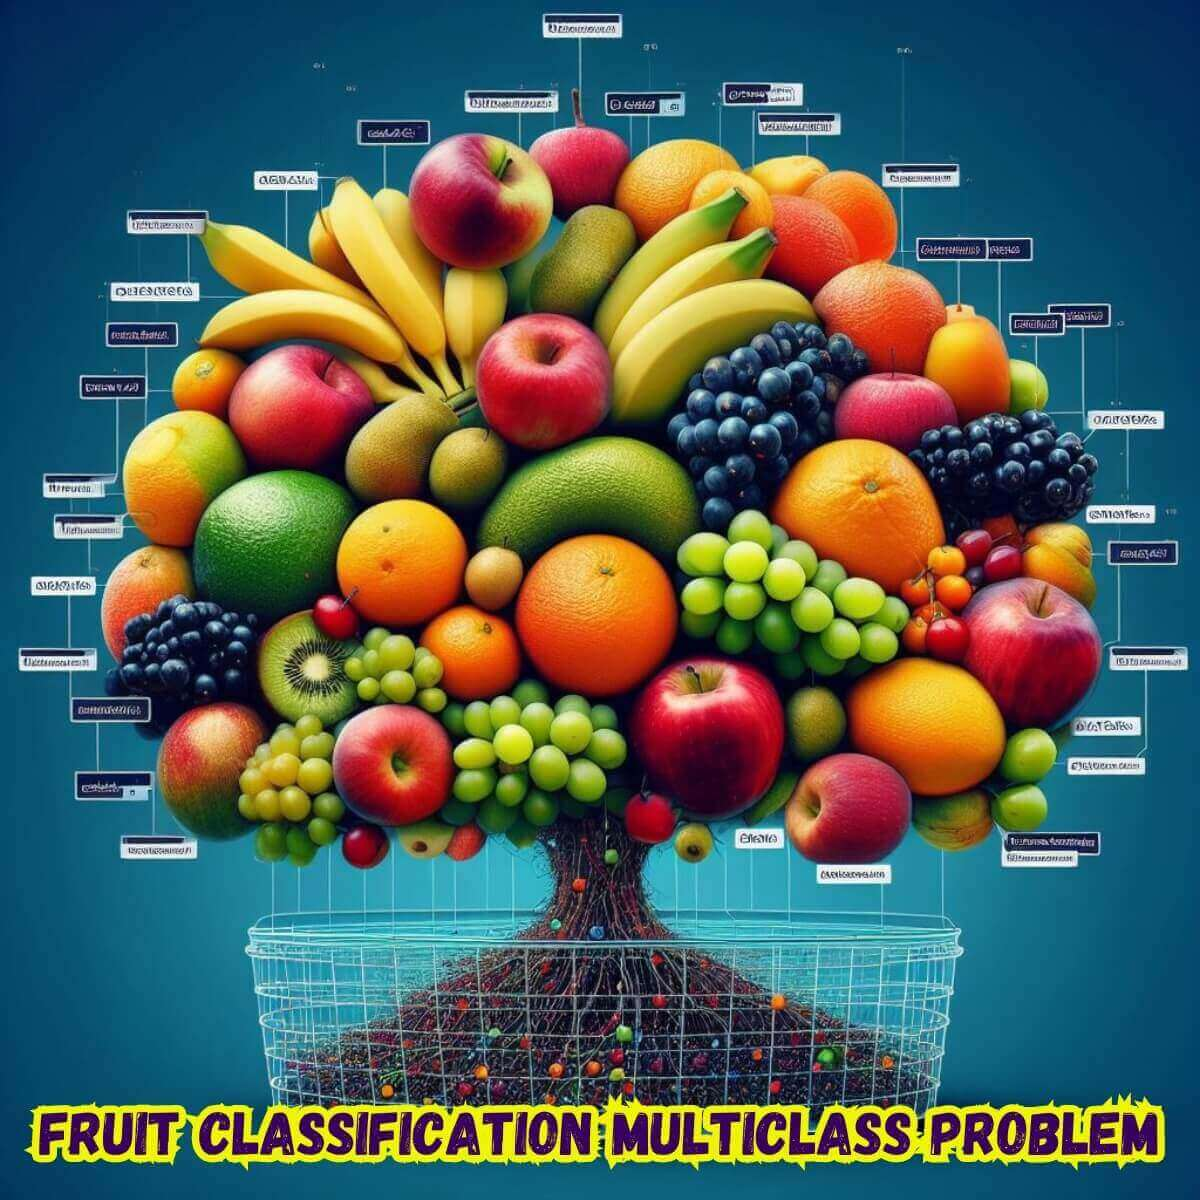

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#690e11;">About Author</p>
## - ***`Project:` Fruit Classification Multiclass Problem***
#### **<h1 align="center"><span style="color:#690e11;">Introduction</span>**
### ***👋 Hello, everyone! My name is Mehak Iftikhar, and I'm delighted to introduce myself to you. I am a Junior Data Scientist passionate about leveraging data to derive meaningful insights and drive impactful decisions. With a keen interest in exploring the realms of data science, I actively engage in various projects and share my learnings through platforms like Kaggle.***

#### **<h1 align="center"><span style="color:#690e11;">About Me</span>**
### ***🔍 As a Junior Data Scientist, I immerse myself in the world of data, constantly seeking innovative ways to analyze, interpret, and visualize information to solve real-world problems. My journey in data science is fueled by a curiosity to unravel patterns, discover trends, and uncover hidden insights within complex datasets.***

#### **<h1 align="center"><span style="color:#690e11;">My Work</span>**
### ***📊 I regularly upload my data analysis notebooks and projects on Kaggle, where I showcase my skills in data manipulation, exploratory data analysis (EDA), machine learning, and more. Through these notebooks, I aim to contribute to the data science community by sharing methodologies, code snippets, and insights gained from my projects.***

#### **<h1 align="center"><span style="color:#690e11;">Passion & Goals</span>**
### ***💡 My passion for data science extends beyond technical skills. I am dedicated to continuous learning and improvement, staying updated with the latest advancements in the field. My ultimate goal is to harness the power of data to make a positive impact on society, whether it's through enhancing business strategies, addressing societal challenges, or driving innovation in various domains.***

#### **<h1 align="center"><span style="color:#690e11;">Let's Connect</span>**
### ***🤝 I am always open to collaboration, knowledge sharing, and networking opportunities. Feel free to connect with me on Kaggle or other professional platforms to discuss data science, share ideas, or explore potential collaborations.***


#### **<h1 align="center"><span style="color:#690e11;">Contact Info</span>**
### ***Click on link below to contact/follow/correct me:***

- ***Email:*** mehakkhan301007@gmail.com
- [LinkedIn](https://www.linkedin.com/in/mehak-iftikhar/)
- [Facebook](https://www.facebook.com/profile.php?id=61552023122774)
- [Twitter](https://twitter.com/mehakkhan874)
- [Github](https://github.com/mehakiftikhar)

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#690e11;">About Dataset</p>

### ***`Dataset link:`*** [Fruit classification(10 Class)](https://www.kaggle.com/datasets/karimabdulnabi/fruit-classification10-class/data)

#### **<h1 align="left"><span style="color:#690e11;">Classes Of Dataset</span>**
### ***`Apple`***
### ***`Orange`***
### ***`Avocado`***
### ***`Kiwi`***
### ***`Mango`***
### ***`Pinenapple`***
### ***`Strawberries`***
### ***`Banana`***
### ***`Cherry`***
### ***`Watermelon`***

#### **<h1 align="center"><span style="color:#690e11;">SOURCES</span>**
### ***This data contains a set of images of 10 kind of fruits , that can be used to make classification using deep learning , i scraped this data from Instagram and google.***

#### **<h1 align="center"><span style="color:#690e11;">COLLECTION METHODOLOGY</span>**
### ***This data was collected by scraping my code in this rebo : https://github.com/karim-abdulnabi/CNN_model/tree/main/scraping_project class of data set : Apple Orange Avocado Kiwi Mango Pinenapple Strawberries Banana Cherry Watermelon i had collected 230 image for all kind from fruit for training and 110 for test***

#### **<h1 align="center"><span style="color:#690e11;">Specifics</span>**
### ***Model: MobileNetV2***

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#690e11;">Import Libraries</p>**

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2
import os
import matplotlib.pyplot as plt
import random
import numpy as np
from pathlib import Path
from keras.preprocessing.image import load_img
import cv2
# encode both columns label and variety
from sklearn.preprocessing import LabelEncoder
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

---

## ***train_datagen:***

### ***`rescale=1./255:` Normalizes pixel values in the training images between 0 and 1. This is a common preprocessing step for image data, as neural networks typically work better with normalized values.***
### ***`rotation_range=40:` Applies random rotations to the training images within a range of -40° to 40° degrees. This helps the model become more robust to variations in object orientation.***
### ***`width_shift_range=0.1, height_shift_range=0.1:` Randomly shifts the training images horizontally and vertically by up to 10% of their width and height, respectively. This simulates small changes in camera position or object placement.***
### ***`horizontal_flip=True:` Randomly flips the training images horizontally. This helps the model learn to recognize objects regardless of their orientation.***
### ***`validation_split=0.2:` Splits the training data into training (80%) and validation (20%) sets. The validation set is used to monitor model performance during training and avoid overfitting.***

## ***test_datagen:***

### ***`rescale=1./255:` Applies the same normalization to the test images as the training images. This ensures consistency in the data processing pipeline.***

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                             rotation_range=40,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             validation_split=0.2)

val_datagen = ImageDataGenerator(rescale = 1./255,
                                validation_split=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#690e11;">Load The Train Images And Test Images</p>**

In [ ]:
train_ds = train_datagen.flow_from_directory(
    directory = '/kaggle/input/fruit-classification10-class/MY_data/train',
    batch_size = 32,
    target_size = (224, 224),
    class_mode='categorical',
    subset="training",
    seed=123  
)

validation_ds = val_datagen.flow_from_directory(
    directory='/kaggle/input/fruit-classification10-class/MY_data/train',
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical',
    subset="validation",
    seed=123 
)


test_ds = train_datagen.flow_from_directory(
    directory = '/kaggle/input/fruit-classification10-class/MY_data/test',
    batch_size = 32,
    target_size = (224, 224),
    class_mode='categorical'
)

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#690e11;">Visualizing The Train Images</p>**

In [ ]:
def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

#### **<h1 align="center"><span style="color:#690e11;">Apple Images</span>**

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/fruit-classification10-class/MY_data/train/Apple"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

#### **<h1 align="center"><span style="color:#690e11;">Banana Images</span>**

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/fruit-classification10-class/MY_data/train/Banana"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

#### **<h1 align="center"><span style="color:#690e11;">Avocado Images</span>**

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/fruit-classification10-class/MY_data/train/avocado"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

#### **<h1 align="center"><span style="color:#690e11;">Cherry Images</span>**

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/fruit-classification10-class/MY_data/train/cherry"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

#### **<h1 align="center"><span style="color:#690e11;">Kiwi Images</span>**

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/fruit-classification10-class/MY_data/train/kiwi"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

#### **<h1 align="center"><span style="color:#690e11;">Mango Images</span>**

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/fruit-classification10-class/MY_data/train/mango"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

#### **<h1 align="center"><span style="color:#690e11;">Orange Images</span>**

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/fruit-classification10-class/MY_data/train/orange"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

#### **<h1 align="center"><span style="color:#690e11;">Pinenapple Images</span>**

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/fruit-classification10-class/MY_data/train/pinenapple"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

#### **<h1 align="center"><span style="color:#690e11;">Strawberries Images</span>**

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/fruit-classification10-class/MY_data/train/strawberries"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

#### **<h1 align="center"><span style="color:#690e11;">Watermelon Images</span>**

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/fruit-classification10-class/MY_data/train/watermelon"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#690e11;">Model Building</p>**

# **<p style="font-family:newtimeroman;font-size:150%;text-align:left;color:#690e11;">Transfer Learning</p>**

In [ ]:
# Load the pre-trained EfficientNetB4 model without the top classification layer
MobileNetV2_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3),
                              pooling='avg')

# Freeze the pre-trained base model layers
MobileNetV2_base.trainable = False

In [ ]:
# Build the model
model = Sequential()

# Add the pre-trained Xception base
model.add(MobileNetV2_base)

# Batch Normalization
model.add(BatchNormalization())

# Dropout Layer
model.add(Dropout(0.35))

# Add a dense layer with 120 units and ReLU activation function
model.add(Dense(220, activation='relu')) 

# Add a dense layer with 120 units and ReLU activation function
model.add(Dense(60, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation function for binary classification
model.add(Dense(10, activation='softmax'))

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#690e11;">Check The Summary Of Model</p>**

In [ ]:
model.summary()

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#690e11;">Compile The Model</p>**

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
 loss='categorical_crossentropy', metrics=['accuracy'])

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#690e11;">Model Training</p>**

In [ ]:
%%time
# # Define the callback function
early_stopping = EarlyStopping(patience=10)

history= model.fit(train_ds,
    validation_data=validation_ds,
    steps_per_epoch=len(train_ds),
    epochs=100, 
    callbacks=[early_stopping]
)

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#690e11;">Plotting The Loss And Accuracy</p>**

In [ ]:
# evaluate the model
loss = model.evaluate(validation_ds)

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#690e11;">Predictions</p>**

In [ ]:
# Get the class labels
class_labels = list(test_ds.class_indices.keys())

# Predict on each image and plot results
num_images = 20
num_images_per_row = 5  # Set the number of images per row
num_rows = 4

plt.figure(figsize=(15, 10))
for i in range(num_images):
    image, label = next(test_ds)
    predictions = model.predict(image)
    
    # Iterate over each image in the batch
    for j in range(len(image)):
        if i * len(image) + j < num_images:  # Check if the total number of images exceeds the desired count
            predicted_class = class_labels[np.argmax(predictions[j])]
            true_class = class_labels[np.argmax(label[j])]
            
            plt.subplot(num_rows, num_images_per_row, i * len(image) + j + 1)
            plt.imshow(image[j])
            plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
            plt.axis('off')

plt.tight_layout()
plt.show()

---
# **<p style="font-family:newtimeroman;font-size:200%;text-align:center;color:#690e11;">THE END</p>**